---
title: "PCA using Eigenvalue Decomposition"
description: "PCA Eigenvalue Decomposition"
author: "Eric Peña"
date: 2020-06-29T00:00:00-00:00
type: technical_note
draft: false
---

In this article, I go into how we can perform Principal Component Analysis (PCA) using the method of Eigenvalue Decomposition (EVD). Generally, PCA is done by peforming a change of basis on the data, typically by utilizing eigenvectors that find the principal directions of the data. Another important thing to know is that the Eigenvalue Decomposition does not always exist. Eigenvalue Decomposition can only be done on square, full-rank, positive semi-definite matricies. Take a look at the PCA Single Value Decomposition article to learn another way of performing PCA. For now, let's continue with EVD.

The general formula for Eigenvalue Decomposition:
$$\Sigma = W \Lambda W^{-1}$$

It is also perhaps worth noting that the Trace of $\Lambda$ is written as:

$$Tr(\Lambda) = \lambda_1 + \lambda_2 + \cdots + \lambda_p = \sigma^2_{Z_1} + \sigma^2_{Z_2} + \cdots + \sigma^2_{Z_p}  = Var(Z)$$

where $Z$ are the vectors in the new space (principal components), $\Sigma$ is the covariance matrix, and $W$ is an $n \times n$ matrix whose $i^{th}$ column is the eigenvector $s_i$ of $\Sigma$.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
%matplotlib inline
np.random.seed(44)
from mpl_toolkits.mplot3d import Axes3D

Let's begin with generating data according to a Normal Bivariate Distribution described below:

$$X ~ N(\mu, \Sigma)\ \ \ \ \ \ \ \ \ \Sigma = \begin{bmatrix}
1 & 3\\\\
3 & 10
\end{bmatrix}$$

Here, I simulate bivariate data from a Gaussian distribution:

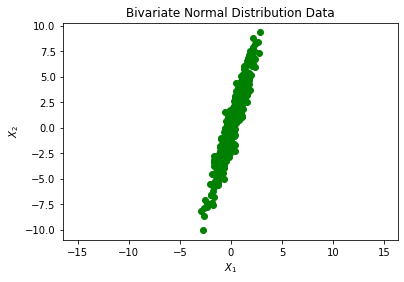

In [4]:
mean = [0,0]
cov = [[1, 3], [3, 10]]
X = np.random.multivariate_normal(mean, cov, 500)
plt.plot(X[:,0], X[:,1], 'go')
plt.title('Bivariate Normal Distribution Data')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.axis('equal')
plt.show()

What I would like to do next is estimate the covariance matrix and compare it with the original $\Sigma$. I will do this in 3 steps:

1. Remove the means from each data point in $X$: $X_c = (X - \bar X)$
2. Calculate: $X_c^T X_c$
3. Divide by the number of degrees of freedom: $(N-1)$

In [5]:
mx = np.mean(X, axis=0)
Xc = X - mx
C = (Xc.T@Xc) / (Xc[:,0].size - 1)
C

array([[ 1.0336447 ,  3.2069841 ],
       [ 3.2069841 , 10.96531616]])

We can see that the computed covariance matrix is quite similar to the original covariance. The basic idea is that `cov` $\approx$ `C`.

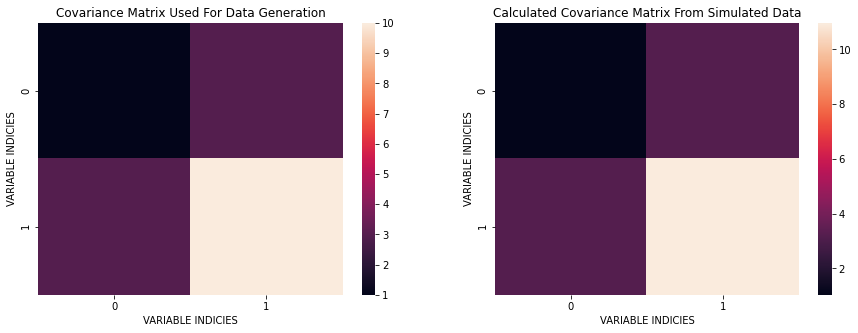

In [6]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.heatmap(cov);
plt.title('Covariance Matrix Used For Data Generation');
plt.xlabel('VARIABLE INDICIES')
plt.ylabel('VARIABLE INDICIES')
plt.subplot(122)
sns.heatmap(C);
plt.title('Calculated Covariance Matrix From Simulated Data');
plt.xlabel('VARIABLE INDICIES')
plt.ylabel('VARIABLE INDICIES')
plt.show()

Next, I perform the Eigenvalue Decomposition of the estimated covariance matrix and show the principal component directions and variance along the new directions. One question that I can ask here is: Does the rotation preserve the total variance (information) in the original data? This is important since what we want to do is preverse the information while fidning an optimal coordinate transformation.

The goal here is done in 2 steps:

1. Find the Eigenvalue and Eigenvectors of the covariance matrix: $C$
2. Project the centered matrix $X_c$ onto the Eigenvector directions using dot product: $(X_c \cdot w_i)$

In [7]:
eigValue, eigVector = np.linalg.eig(C)
print(f'Eigenvalues:\n{eigValue}\n\nEigenvectors:\n{eigVector}')

Eigenvalues:
[ 0.08811244 11.91084842]

Eigenvectors:
[[-0.95917894 -0.28279985]
 [ 0.28279985 -0.95917894]]


Now we perform the dot product projection

In [8]:
Z = Xc @ eigVector

Now I plot this projection to see what has happened to our original data:

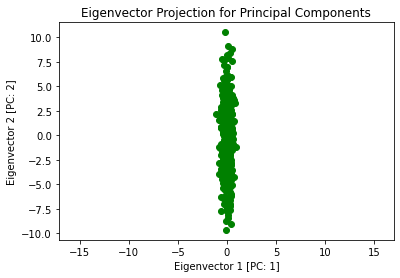

In [9]:
plt.plot(Z[:,0], Z[:,1], 'go')
plt.title('Eigenvector Projection for Principal Components')
plt.xlabel('Eigenvector 1 [PC: 1]')
plt.ylabel('Eigenvector 2 [PC: 2]')
plt.axis('equal')
plt.show()

What we can do next is view these newly found principal components and apply them to the data in the original space:

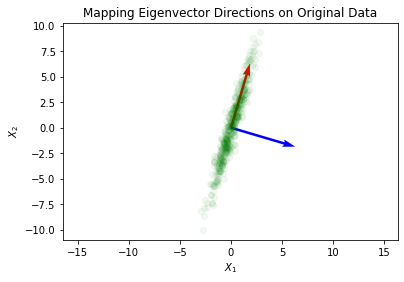

In [13]:
origin = [0, 0], [0, 0]
plt.quiver(*origin, -eigVector[:,1], -eigVector[:,0], color=['r','b'], scale=5)
plt.plot(X[:,0], X[:,1], 'go', alpha=0.05)
plt.title('Mapping Eigenvector Directions on Original Data')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.axis('equal')
plt.show()

Now I find the variance in the new orthogonal space:

In [14]:
zVariance = np.sum(eigValue)
print(f'Variance in newly found orthogonal space: {zVariance}')

Variance in newly found orthogonal space: 11.998960856672458


The variance of the original $X$ input matrix is the sum of variance along the columns of $X$. I show this below as well:

In [15]:
xVariance = np.var(X[:,0]) + np.var(X[:,1])
print(f'Variance in original orthogonal space: {xVariance}')

Variance in original orthogonal space: 11.97496293495911


This is fantastic! We've found our principal components using Eigenvalue Decomposition. This can be generalized to many dimensions which is where PCA is typically applied for dimensionality reduction. It is important to learn the theory behind machine learning algorithms as oppose to using them as black-box techniques.